Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r'C:\Users\Achilles\Kaggle\Titanic\Data\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 90.5+ KB


In [159]:
#[data['PassengerId'].map(pd.isna)]

#data[data.isnull().any(axis=1)]
#data = data[data['Embarked'].notna()]

data.isna().any(axis=0)

#data.head()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [160]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [161]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [162]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [163]:
data = data.drop_duplicates(keep='first')

In [164]:
data['Sex'].replace({'male':1,'female':0},inplace=True) #'male':1,'female':0

In [165]:
data['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)  #'S':1,'C':2,'Q':3

In [166]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [167]:
import re
s = 'Rothes, the Countess. of (Lucy Noel Martha'
s1 = 'Reuchlin, Jonkheer. John George'
re.findall('[A-Za-z,\s]*\s([A-Za-z]*).\s[A-Za-z\s]*',s)

['Countess', 'Noe']

In [169]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [168]:
data['Title'] = data['Name'].str.extract('[A-Za-z,\s]*\s([A-Za-z]*).\s[A-Za-z\s]*')

In [170]:
data['Title'] = data['Title'].apply(lambda x: x if x in ('Mr','Miss','Mrs','Master','Dr','Rev') else 'Rare')

In [171]:
data['Title'].replace({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':5,'Rare':6},inplace=True)

In [172]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,22.0,1,0,7.2500,1,2,0
1,1,1,0,38.0,1,0,71.2833,2,2,2
2,1,3,0,26.0,0,0,7.9250,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2
4,0,3,1,35.0,0,0,8.0500,1,1,0


In [173]:
data['Fare'] = pd.qcut(data['Fare'],5,labels=(1,2,3,4,5))

In [174]:
data['Age'] = pd.cut(data['Age'].astype(int),5,labels=(1,2,3,4,5))

In [175]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,2,1,0,1,1,2,0
1,1,1,0,3,1,0,5,2,2,2
2,1,3,0,2,0,0,2,1,1,1
3,1,1,0,3,1,0,5,1,2,2
4,0,3,1,3,0,0,2,1,1,0


In [176]:
ndf = data.copy()
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,2,1,0,1,1,2,0
1,1,1,0,3,1,0,5,2,2,2
2,1,3,0,2,0,0,2,1,1,1
3,1,1,0,3,1,0,5,1,2,2
4,0,3,1,3,0,0,2,1,1,0


In [177]:
ndf['Survived'].value_counts() #0 = No, 1 = Yes

0    549
1    342
Name: Survived, dtype: int64

In [138]:
ndf[ndf['Survived']==1].groupby('Sex')['Survived'].count()

Sex
0    233
1    109
Name: Survived, dtype: int64

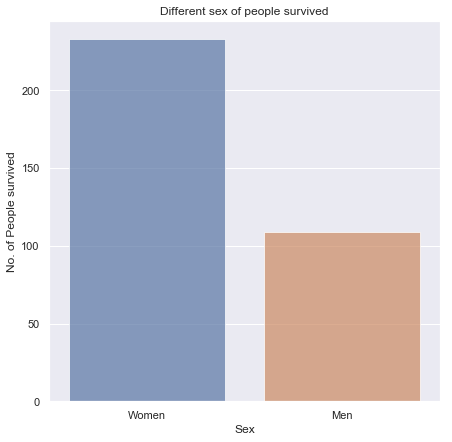

In [178]:
### Different sex of people survived
%matplotlib inline
sex = ndf[ndf['Survived']==1].groupby('Sex')['Survived'].count()#.plot(kind='bar',title='Men vs Women\nWho survived')
#sex.index
sns.set()
plt.figure(figsize=(7,7))
sns.barplot(sex.index,sex,alpha=0.7)
plt.xticks([0,1],['Women','Men'])
plt.ylabel('No. of People survived')
plt.title('Different sex of people survived');


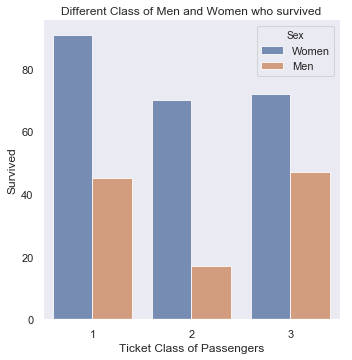

In [179]:
##Different Class of Men and Women who survived
%matplotlib inline

sns.set_style('dark')
Pclass = ndf[ndf['Survived']==1].groupby(['Pclass','Sex'])['Survived'].count()
Pclass = Pclass.reset_index()
Pclass['Sex'] = Pclass['Sex'].replace({0:'Women',1:'Men'})
sns.catplot('Pclass',
            'Survived',
            hue='Sex',
            kind='bar',
            data = Pclass,
            alpha=0.8,
            legend_out=False)
plt.xlabel('Ticket Class of Passengers')
plt.title('Different Class of Men and Women who survived');

In [180]:
emb = ndf[ndf['Survived']==1].groupby(['Embarked','Pclass','Sex'])['Survived'].count()
emb = emb.reset_index()
emb['Sex'] = emb['Sex'].replace({0:'Women',1:'Men'})
total = list(data.groupby('Embarked')['Survived'].count())
emb['Embarked'] = emb['Embarked'].replace({1:'Southampton\nTotal Passengers: '+str(total[0]),2:'Cherbourg\nTotal Passengers: '+str(total[1]),3:'Queenstown\nTotal Passengers: '+str(total[2])})
emb.rename(columns={'Embarked':'Port of Embarkation','Pclass':'Ticket class','sex':'Sex'},inplace=True)

In [143]:
list(data.groupby('Embarked')['Survived'].count())

[646, 168, 77]

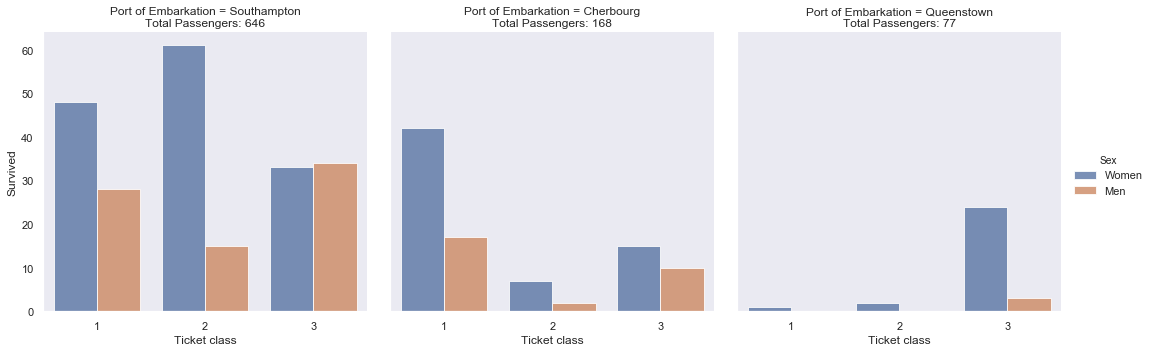

In [181]:
%matplotlib inline

sns.catplot('Ticket class',
            'Survived',
            hue='Sex',
            col='Port of Embarkation',
            data=emb,
            kind='bar',
            alpha=0.8)

In [145]:
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,"(16.0, 32.0]",1,0,"(-0.001, 7.854]",1,2,0
1,1,1,0,"(32.0, 48.0]",1,0,"(39.688, 512.329]",2,2,2
2,1,3,0,"(16.0, 32.0]",0,0,"(7.854, 10.5]",1,1,1
3,1,1,0,"(32.0, 48.0]",1,0,"(39.688, 512.329]",1,2,2
4,0,3,1,"(32.0, 48.0]",0,0,"(7.854, 10.5]",1,1,0


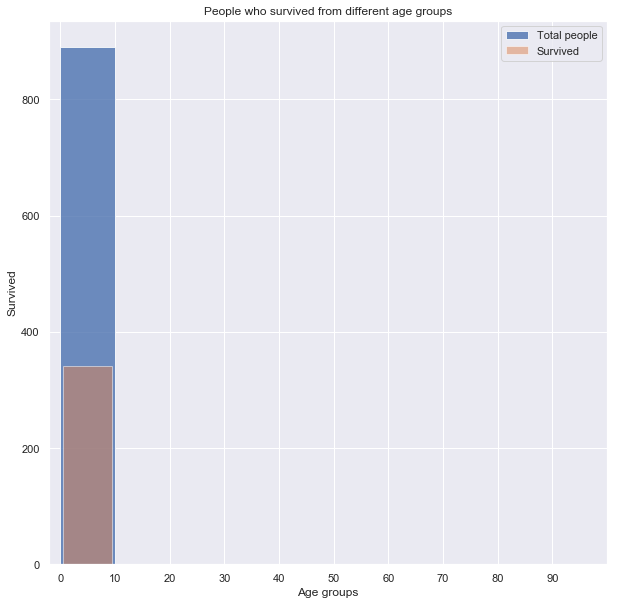

In [182]:
%matplotlib inline
age = ndf[ndf['Survived']==1]
sns.set()
plt.figure(figsize=(10,10))
plt.hist('Age',bins=10,data=ndf,rwidth=1,range=[0,100],label='Total people',alpha=0.8)
plt.hist('Age',bins=10,data=age,rwidth=0.9,range=[0,100],label='Survived',alpha=0.5)
plt.xlim(-2,100)
plt.xticks(range(0,100,10))
plt.xlabel('Age groups')
plt.ylabel('Survived')
plt.title('People who survived from different age groups')
plt.legend()

In [26]:
ndf['Age_grp'] = (ndf['Age']/10).astype(int)

#Model training

In [204]:
from sklearn.ensemble import RandomForestRegressor as rfc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc

In [184]:
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,2,1,0,1,1,2,0
1,1,1,0,3,1,0,5,2,2,2
2,1,3,0,2,0,0,2,1,1,1
3,1,1,0,3,1,0,5,1,2,2
4,0,3,1,3,0,0,2,1,1,0


In [185]:
ndf.isna().any(axis=0)

Survived      False
Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
FamilySize    False
Title         False
dtype: bool

In [186]:
train_data = ndf.copy()

In [187]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,1,2,1,0,1,1,2,0
1,1,1,0,3,1,0,5,2,2,2
2,1,3,0,2,0,0,2,1,1,1
3,1,1,0,3,1,0,5,1,2,2
4,0,3,1,3,0,0,2,1,1,0


In [205]:
X_train,X_test,y_train,y_test = train_test_split(train_data.iloc[:,1:],train_data.iloc[:,0],random_state=1)

In [206]:
knn = knc().fit(X_train,y_train)

In [207]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8607784431137725
0.7668161434977578


##Test Data Prep

In [208]:
data = pd.read_csv(r'C:\Users\Achilles\Titanic\Data\test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [209]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [210]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [211]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [212]:
data = data.drop_duplicates(keep='first')

In [213]:
data['Sex'].replace({'male':1,'female':0},inplace=True) #'male':1,'female':0

In [214]:
data['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)  #'S':1,'C':2,'Q':3

In [215]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [216]:
data['Title'] = data['Name'].str.extract('[A-Za-z,\s]*\s([A-Za-z]*).\s[A-Za-z\s]*')

In [217]:
data['Title'] = data['Title'].apply(lambda x: x if x in ('Mr','Miss','Mrs','Master','Dr','Rev') else 'Rare')

In [218]:
data['Title'].replace({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':4,'Rev':5,'Rare':6},inplace=True)

In [219]:
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [220]:
data['Fare'] = pd.qcut(data['Fare'],5,labels=(1,2,3,4,5))

In [221]:
data['Age'] = pd.cut(data['Age'].astype(int),5,labels=(1,2,3,4,5))

In [228]:
data.set_index('PassengerId',inplace=True)

In [229]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
PassengerId,,,,,,,,,
892,3,1,3,0,0,2,3,1,0
893,3,0,4,1,0,1,1,2,2
894,2,1,5,0,0,2,3,1,0
895,3,1,2,0,0,2,1,1,0
896,3,0,2,1,1,3,1,3,2


In [230]:
data.isna().any(axis=0)

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Embarked      False
FamilySize    False
Title         False
dtype: bool

In [236]:
data['Survived'] = knn.predict(data)

In [237]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,Survived
PassengerId,,,,,,,,,,
892,3,1,3,0,0,2,3,1,0,0
893,3,0,4,1,0,1,1,2,2,0
894,2,1,5,0,0,2,3,1,0,0
895,3,1,2,0,0,2,1,1,0,0
896,3,0,2,1,1,3,1,3,2,0


In [240]:
data['Survived'].to_csv('Result.csv',header=True)